<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_45/Ikea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read in packages and data

**Packages**

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

**Data**

In [2]:
# Url -> df
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv')

# Inspect
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


# Wrangle

**Find the min, max, and median price in each category. You could do this all in one groupby, but then you have to handle the multindex queries :shrug:**

In [3]:
# Find min, max, median price by category
min_cat = df.groupby('category').min()['price']
max_cat = df.groupby('category').max()['price']
median_cat = df.groupby('category').median()['price']

# Concat all series together
df_price = pd.concat([min_cat, max_cat, median_cat], axis = 1)

# Rename columns
df_price.columns = ['min', 'max', 'median']

# Sort by max
df_price = df_price.sort_values(by = 'max', ascending = True)

# Peep
df_price.head()                                                                    

,min,max,median
category,,,
Café furniture,145.0,1385.0,424.5
Nursery furniture,5.0,1545.0,350.0
Children's furniture,5.0,1545.0,202.5
Chests of drawers & drawer units,49.0,1880.0,460.0
"Sideboards, buffets & console tables",295.0,2100.0,965.0


**Collect components for plot**

In [124]:
########
##DATA##
########

# Y positions
y_pos = np.arange(0, df_price.shape[0])

# Left coordinate
left_coord = df_price['min'].to_list()

# Right coordinate for max cap
right_coord = df_price['max'].to_list()

# Need to subtract left coord from right coord for bar plot to get correct length since not starting at zero
bar_right_coord = [a_i - b_i for a_i, b_i in zip(right_coord, left_coord)]

# Median point
median_point = df_price['median'].to_list()

# Plot

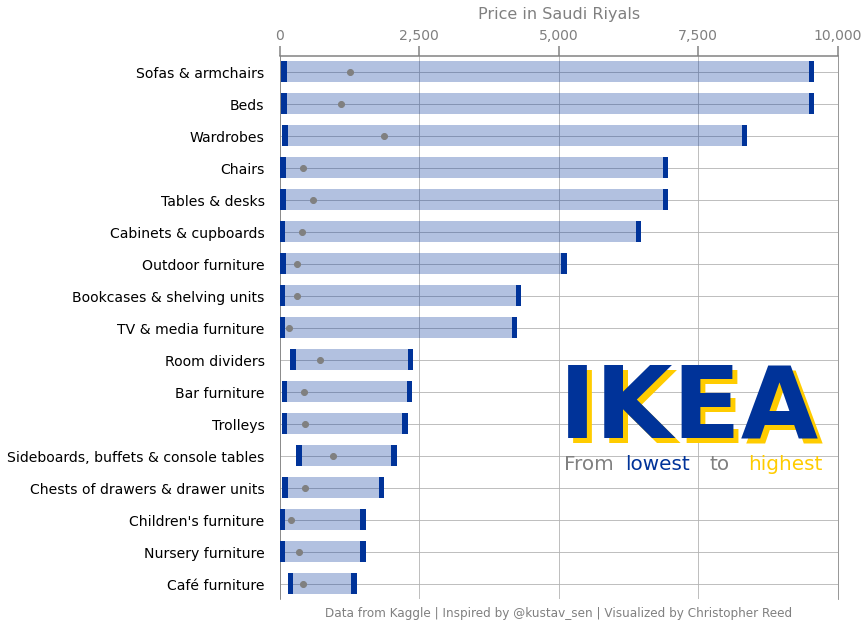

In [137]:
# Create fig and ax
fig, ax = plt.subplots(figsize = (10, 10))

###################
##CAPPED BAR PLOT##
###################

# Min cap
ax.barh(y_pos, width = 100, left = left_coord, height = 0.65, color = '#003399', zorder = 100)

# Middle component of bar plot
ax.barh(y_pos, width = bar_right_coord, left = left_coord, height = 0.65, color = '#003399', alpha = 0.3, zorder = 90)

# Max cap
ax.barh(y_pos, width = -100, left = right_coord, height = 0.65, color = '#003399', zorder = 100)

################
##MEDIAN POINT##
################

# Median points
ax.scatter(median_point, y_pos, zorder = 100, color = 'grey')

##############
##GRID LINES##
##############

ax.grid(b = True, which = 'major', axis = 'both')

# Need this or else major gridlines don't line up with figure spines
ax.set_xlim(left = 0, right = 10000)
ax.set_ylim(bottom = -0.5, top = 16.5)

##########
##SPINES##
##########

# Make all spines grey
for side in ['top', 'right', 'bottom', 'left']:
  ax.spines[side].set_color('grey')

# Make top spine thicker
ax.spines['top'].set_linewidth(1.5)

# Hide the bottom spine
ax.spines['bottom'].set_visible(False)

#########################
##TICKS AND TICK LABELS##
#########################

# Set y ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(df_price.index.to_list())

# Put x ticks on the top spine
ax.xaxis.tick_top()
ax.set_xticks(np.arange(0, 12500, 2500))
ax.set_xlabel('Price in Saudi Riyals', fontsize = 16, labelpad = 10, color = 'grey')
ax.xaxis.set_label_position('top')

# Y axis specific
ax.tick_params(axis = 'y', length = 0, labelsize = 14, labelcolor = 'black', pad = 15)

# X axis specific
ax.tick_params(axis = 'x', width = 1.5, labelsize = 14, color = 'grey', labelcolor = 'grey', length = 10, top = True)

# Commas for x axis tick labels
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])

#################################
##TITLES, LABELS,  AND CAPTIONS##
#################################

# IKEA with shadow
ax.text(0.5, 0.3, 'IKEA', fontsize = 100, weight = 'bold', transform = ax.transAxes, color = '#003399', zorder = 100)
ax.text(0.51, 0.29, 'IKEA', fontsize = 100, weight = 'bold', transform = ax.transAxes, color = '#ffcc00')

# Color sub text
ax.text(0.51, 0.24, 'From', fontsize = 20, transform = ax.transAxes, color = 'grey')
ax.text(0.62, 0.24, 'lowest', fontsize = 20, transform = ax.transAxes, color = '#003399')
ax.text(0.77, 0.24, 'to', fontsize = 20, transform = ax.transAxes, color = 'grey')
ax.text(0.84, 0.24, 'highest', fontsize = 20, transform = ax.transAxes, color = '#ffcc00')

# Caption
cap = 'Data from Kaggle | Inspired by @kustav_sen | Visualized by Christopher Reed'
ax.text(0.5, -0.03, cap, color = 'grey', ha = 'center', fontsize = 12, transform = ax.transAxes)

#Save
plt.savefig('ikea.jpg', bbox_to_inches = 'tight')